In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score


In [3]:
songs_df = pd.read_csv(r"C:\Users\Marvin\Documents\WBS\Data-Science-Bootcamp\6_Unsupervised ML\Data\6.3.3_spotify_5000_songs.csv")
songs_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [4]:
songs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [5]:
song_features_df = songs_df.loc[:,"danceability ":"duration_ms "]
song_features_df = song_features_df.drop(["type ", "key ", "loudness ", "speechiness ", "duration_ms "], axis=1)
song_features_df

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
0,0.6580,0.25900,0,0.694,0.000059,0.9750,0.3060,110.376
1,0.7420,0.39900,1,0.217,0.000002,0.1070,0.6930,125.039
2,0.8510,0.73000,1,0.453,0.000063,0.1240,0.9050,93.698
3,0.7050,0.05020,1,0.879,0.000041,0.3860,0.5240,106.802
4,0.6510,0.11900,1,0.916,0.000343,0.1040,0.4020,120.941
...,...,...,...,...,...,...,...,...
5230,0.2020,0.06940,1,0.917,0.715000,0.0832,0.0655,87.906
5231,0.1880,0.10100,1,0.855,0.426000,0.0694,0.0355,83.134
5232,0.0596,0.00093,1,0.951,0.969000,0.0772,0.0344,71.573
5233,0.1330,0.02080,1,0.883,0.505000,0.1110,0.0591,67.109


In [6]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler().set_output(transform="pandas")

# Use the transformer to transform the data
scaled_song_features_df = my_min_max.fit_transform(song_features_df)

In [7]:
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 25, random_state = 50)

# 3. fit the model to the data
my_kmeans.fit(scaled_song_features_df) 

# 4. obtain the cluster output
clusters = my_kmeans.labels_

# 5. attach the cluster output to our original DataFrame
scaled_song_features_df["cluster"] = clusters

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
scaled_song_features_df

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.680455,0.25900,0.0,0.696787,0.000060,0.987842,0.310660,0.515800,20
1,0.767322,0.39900,1.0,0.217871,0.000002,0.108409,0.703553,0.584322,10
2,0.880041,0.73000,1.0,0.454819,0.000064,0.125633,0.918782,0.437862,3
3,0.729059,0.05020,1.0,0.882530,0.000041,0.391084,0.531980,0.499098,14
4,0.673216,0.11900,1.0,0.919679,0.000348,0.105370,0.408122,0.565171,14
...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.06940,1.0,0.920683,0.725888,0.084296,0.066497,0.410795,18
5231,0.194416,0.10100,1.0,0.858434,0.432487,0.070314,0.036041,0.388495,18
5232,0.061634,0.00093,1.0,0.954819,0.983756,0.078217,0.034924,0.334469,18
5233,0.137539,0.02080,1.0,0.886546,0.512690,0.112462,0.060000,0.313608,18


In [9]:
scaled_song_features_df[["cluster"]].sort_values(by='cluster')

,cluster
1415,0
971,0
953,0
4902,0
4907,0
...,...
4785,24
1289,24
5075,24
1365,24


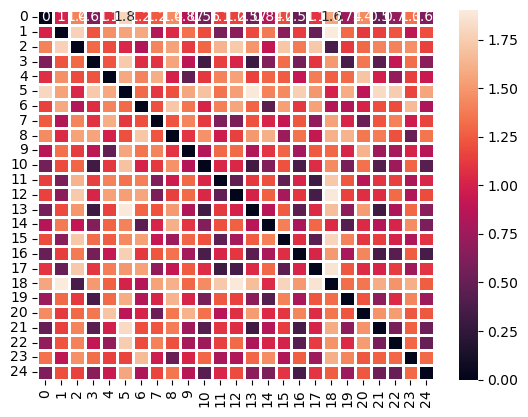

In [10]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = my_kmeans.cluster_centers_

# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

# Plot distances on heatmap
sns.heatmap(centroid_distances,
            annot=True,
            linewidths=1);

In [11]:
scaled_song_features_df.groupby(by="cluster").mean()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,
0,0.603920,0.780379,1.0,0.165504,0.008523,0.630478,0.562189,0.566656
1,0.631313,0.829320,0.0,0.113695,0.021758,0.691672,0.497339,0.580272
2,0.445130,0.188657,1.0,0.926877,0.865013,0.157423,0.288009,0.632594
3,0.741627,0.686934,1.0,0.352333,0.013298,0.150545,0.844390,0.548190
4,0.252980,0.908642,1.0,0.006253,0.827169,0.200480,0.198070,0.564616
5,0.336844,0.138273,0.0,0.924996,0.888064,0.133132,0.166596,0.478136
6,0.366916,0.170366,1.0,0.914266,0.047443,0.180646,0.201366,0.494856
7,0.653330,0.490958,0.0,0.652677,0.049647,0.164766,0.641212,0.557638
8,0.271033,0.908054,0.0,0.006378,0.811269,0.199484,0.223140,0.569479


In [12]:
scaled_song_features_df.columns

Index(['danceability ', 'energy   ', 'mode ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ', 'cluster'],
      dtype='object')

In [13]:
# State the label for each arm of the chart
categories = ["danceability", "energy", "mode", "acousticness",
 "instrumentalness", "valence", "liveness", "tempo"]

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(scaled_song_features_df['cluster'].unique()):
  cluster_song_means = go.Scatterpolar(
    r=[scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'danceability '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'energy   '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'mode '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'acousticness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'instrumentalness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'valence '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'liveness '].mean(),
      scaled_song_features_df.loc[scaled_song_features_df["cluster"] == cluster, 'tempo   '].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_song_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of mean song feature by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

Cluster 0 = energy, 549 songs --> Death Metal, Electronic Pop

Cluster 1 = acousticness & valence & danceability, 454 songs --> Jazz, Swing, Pop, Gospel

Cluster 2 = acousticness & instrumentalness & key, 339 songs --> Instrumental, Piano

Clsuter 3 = key & danceabilit & valence & energy, 979 songs --> Reggae, Reggaeton, Dance

Cluster 4 = energy & key, 586 songs --> Heavy Metal, Dance/Electronic

Cluster 5 = energy & instrumentalness, 405 songs --> Doomer, Grime Core

Cluster 6 = acousticness & key, 373 songs --> Singer Songwriter, Classic, Jazz

Cluster 7 = valence & energy & danceability, 792 songs --> Disco, Dance-Pop, Reggeaton

Cluster 8 = acousticness & instrumentalness, 263 songs --> Piano

Cluster 9 = energy & instrumentalness & key, 495 songs --> Death Metal

In [14]:
sample = scaled_song_features_df[scaled_song_features_df['cluster'] == 9].sample()

In [15]:
songs_df.loc[songs_df["Unnamed: 0"]== sample.index[0]]

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
3097,3097,Casino Royale ...,DJ Zinc,0.551,0.963,8,-5.527,1,0.0466,0.00663,0.923,0.0891,0.84,172.049,,428947,4,7dWYzVDxFBbUrvACgbx5Xt,https://open.spotify.com/track/7dWYzVDxFBbUrvA...


## Choose right number of clusters (K)

In [17]:
# Decide on a random_state to use
seed = 50

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(1, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(scaled_song_features_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



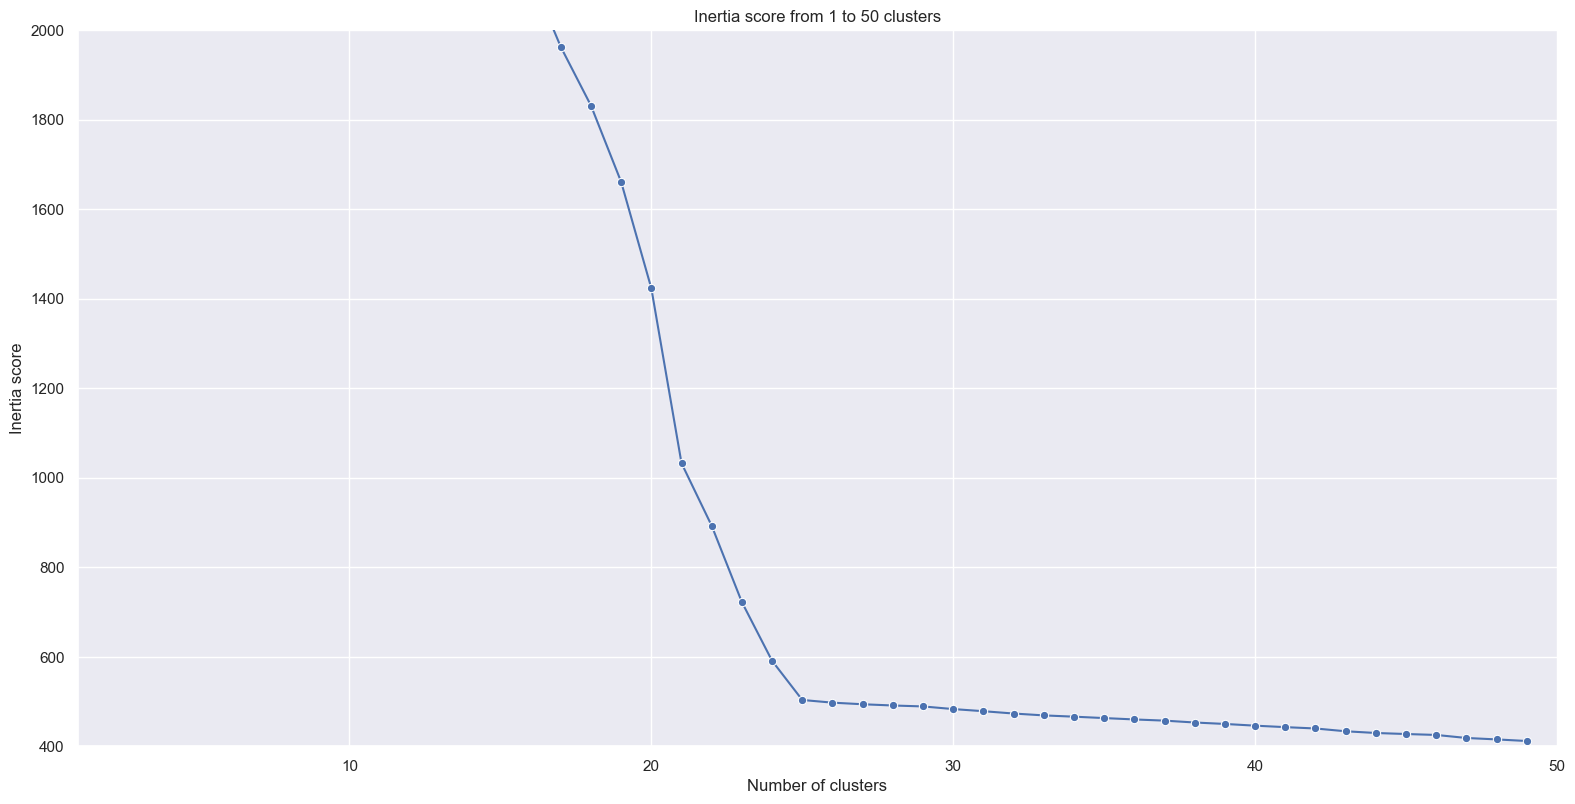

In [19]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(1,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
# Set the limits of the x and y axes
.set(xlim=(1, 50), ylim=(400, 2000))
);

In [18]:
# Calculate the Euclidean distances between all pairs of students in the foods_df DataFrame
distances_array = pairwise_distances(scaled_song_features_df, metric='euclidean')

# Create a Pandas DataFrame from the distances_array
euclidean_distances_df = pd.DataFrame(distances_array,
                                      index=scaled_song_features_df.index,
                                      columns=scaled_song_features_df.index,)

# Display the Euclidean distances DataFrame
euclidean_distances_df  #.astype(int) #

,0,1,2,3,4,5,6,7,8,9,...,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234
0,0.000000,10.108856,17.071600,6.122568,6.153050,14.069251,13.044943,1.641510,17.060627,1.809831,...,14.074868,2.659783,18.073737,15.061953,15.061554,2.592742,2.531364,2.723988,2.553487,2.435609
1,10.108856,0.000000,7.017584,4.084299,4.082578,4.094619,3.286503,9.043692,7.008011,9.031868,...,4.141111,8.141841,8.095640,5.269086,5.300748,8.116518,8.093192,8.165643,8.107842,8.072226
2,17.071600,7.017584,0.000000,11.040457,11.041267,3.169685,4.218523,16.015563,0.518801,16.011264,...,3.267660,15.093967,1.697386,2.667607,2.752396,15.078445,15.066531,15.106725,15.075031,15.052010
3,6.122568,4.084299,11.040457,0.000000,0.332522,8.013506,7.093418,5.075932,11.029155,5.090801,...,8.047931,4.179378,12.042898,9.118604,9.125565,4.137371,4.103303,4.218158,4.116842,4.063079
4,6.153050,4.082578,11.041267,0.332522,0.000000,8.004553,7.091219,5.102515,11.026090,5.078682,...,8.034610,4.149057,12.035842,9.108208,9.112201,4.109191,4.073200,4.189217,4.092030,4.060155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,2.592742,8.116518,15.078445,4.137371,4.109191,12.025111,11.079239,1.779486,15.055632,1.520638,...,12.023073,0.176665,16.005379,13.046567,13.040036,0.000000,0.304611,0.317639,0.253679,0.433838
5231,2.531364,8.093192,15.066531,4.103303,4.073200,12.016694,11.077656,1.685875,15.045218,1.468012,...,12.008752,0.457005,16.011628,13.055982,13.041723,0.304611,0.000000,0.586358,0.157634,0.380558
5232,2.723988,8.165643,15.106725,4.218158,4.189217,12.047834,11.100081,1.976322,15.081596,1.706200,...,12.042102,0.176705,16.009812,13.050851,13.042760,0.317639,0.586358,0.000000,0.484724,0.678403
5233,2.553487,8.107842,15.075031,4.116842,4.092030,12.021874,11.080683,1.732161,15.053948,1.537572,...,12.013127,0.384918,16.011730,13.055716,13.039801,0.253679,0.157634,0.484724,0.000000,0.364984


In [20]:
scaled_song_features_df.columns

Index(['danceability ', 'energy   ', 'mode ', 'acousticness ',
       'instrumentalness ', 'liveness ', 'valence ', 'tempo   ', 'cluster'],
      dtype='object')

In [21]:
import plotly.graph_objects as go

#

# Extract the features for plotting
x = scaled_song_features_df['energy   ']
y = scaled_song_features_df['danceability ']
z = scaled_song_features_df['tempo   ']
student_names = scaled_song_features_df.index

# Extract the centroids for the selected features
centroid_x = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('energy   ')]
centroid_y = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('danceability ')]
centroid_z = my_kmeans.cluster_centers_[:, scaled_song_features_df.columns.get_loc('tempo   ')]

# Create a 3D scatter plot for data points
fig = go.Figure()

# Add data points to the plot, with the student names
fig.add_trace(go.Scatter3d(
    x=x, y=y, z=z,
    text=student_names,
    mode='markers+text',  # Enable marker and text mode
    marker=dict(
        size=3,
        color=scaled_song_features_df['cluster'],  # Color points by the cluster assignment
        colorscale='Viridis',
        opacity=0.8
    ),
    hoverinfo='text',
    name='Data Points'
))

# Add centroids to the plot as large, semi-transparent points
fig.add_trace(go.Scatter3d(
    x=centroid_x, y=centroid_y, z=centroid_z,
    mode='markers',
    marker=dict(
        size=10,
        color=[i for i in range(len(centroid_x))],  # Use a distinct color for each centroid
        colorscale='Viridis',
        opacity=0.9
    ),
    name='Centroids'
))

# Update the layout of the plot
fig.update_layout(
    width=1000,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    title='3D Scatter Plot for KMeans Clusters with Student Names',
    scene=dict(
        xaxis_title='Energy',
        yaxis_title='Danceability',
        zaxis_title='Tempo'
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Show the plot
fig.show()
